In [1]:
import flip
import pandas as pd
import numpy as np
from pathlib import Path
from astropy.constants import c 
__C_LIGHT_KMS__ = c.to('km/s').value
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.74, Om0=0.3089)
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os
plt.style.use(['seaborn-v0_8-deep', os.environ['HOME'] + '/.matplotlib_style/paper.mplstyle'])


[ 000000.00 ]: 03-10 10:41  root            INFO     No pypower module detected, gridding with this method is unavailable
[ 000000.00 ]: 03-10 10:41  root            INFO     Jax is not available, loading numpy and scipy instead


In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.concat([pd.read_csv(f) for f in sorted(glob.glob('../result_sigu_calibration/*'))], keys=np.arange(8))

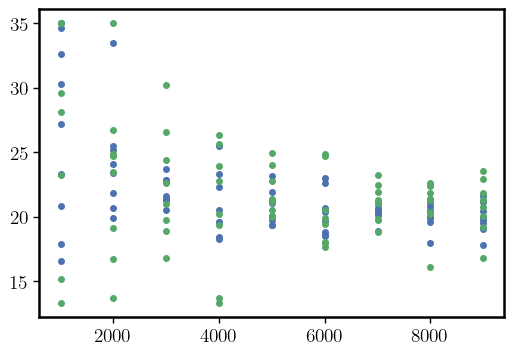

In [19]:
plt.scatter(df[df['fs8_fixed']].N, df[df['fs8_fixed']].sigu)

plt.scatter(df[~df['fs8_fixed']].N, df[~df['fs8_fixed']].sigu)

In [12]:
def plot_sigu(df, fs8_fixed=True, ax=None, label=None, color=None, offset=0):
    mask = df['fs8_fixed']
    if fs8_fixed:
        sdf = df[df['fs8_fixed']]
    else:
        sdf = df[~df['fs8_fixed']]

    if ax is None:
        fig = plt.figure(dpi=150)
        ax = fig.add_subplot()
    mean_sigu = sdf.groupby('N').apply(lambda x: np.sum(x['sigu'] / x['e_sigu']**2) / np.sum(1 / x['e_sigu']**2), include_groups=False)
    e_mean_sigu = sdf.groupby('N').apply(lambda x: 1 / np.sqrt(np.sum(1 / x['e_sigu']**2)), include_groups=False)

    for m in np.arange(8):
        ax.plot(sdf.loc[m].sort_values('N')['N'], sdf.loc[m].sort_values('N')['sigu'], color=color, alpha=0.2)
    ax.errorbar(mean_sigu.index.values + offset, mean_sigu, fmt='o', yerr=e_mean_sigu, label=label, color=color, ms=6, lw=2)

    ax.set_xlabel(r'$N_\mathrm{gal}$')
    ax.set_ylabel(r'$\sigma_u$')


In [6]:
def plot_fs8(df, ax=None,):
    if ax is None:
        fig = plt.figure(dpi=150)
        ax = fig.add_subplot()
    mean_sigu = df[~df['fs8_fixed']].groupby('N').apply(lambda x: np.sum(x['fs8'] / x['e_fs8']**2) / np.sum(1 / x['e_fs8']**2), include_groups=False)
    e_mean_sigu = df[~df['fs8_fixed']].groupby('N').apply(lambda x: 1 / np.sqrt(np.sum(1 / x['e_fs8']**2)), include_groups=False)

    for m in np.arange(8):
        ax.plot(df[~df['fs8_fixed']].loc[m].sort_values('N')['N'], df[~df['fs8_fixed']].loc[m].sort_values('N')['fs8'], c='k', alpha=0.2)
    ax.errorbar(mean_sigu.index, mean_sigu, fmt='o', yerr=e_mean_sigu)
    ax.set_xlabel('N')
    ax.set_ylabel(r'$f\sigma_8$')


In [7]:
def print_fs8res(df, NSN):
    sdf = df[df['fs8_fixed']]
    mean_sigu_w = sdf.groupby('N').apply(lambda x: np.sum(x['sigu'] / x['e_sigu']**2) / np.sum(1 / x['e_sigu']**2), include_groups=False)
    e_mean_sigu_w = sdf.groupby('N').apply(lambda x: 1 / np.sqrt(np.sum(1 / x['e_sigu']**2)), include_groups=False)

    mean_sigu = sdf.groupby('N').sigu.mean()
    e_mean_sigu = sdf.groupby('N').sigu.std()
    e_mean_sigu /= np.sqrt(len(e_mean_sigu))

    print('FOR FS8 FIXED TO FID:')
    print(f' - SIGU AT N={NSN} <sigu>_w = {mean_sigu_w.loc[NSN]:.2f} + / -  {e_mean_sigu_w.loc[NSN]:.2f}')
    print(f' - SIGU AT N={NSN} <sigu> = {mean_sigu.loc[NSN]:.2f} + / -  {e_mean_sigu.loc[NSN]:.2f}')

    sdf = df[~df['fs8_fixed']]
    mean_sigu_w = sdf.groupby('N').apply(lambda x: np.sum(x['sigu'] / x['e_sigu']**2) / np.sum(1 / x['e_sigu']**2), include_groups=False)
    e_mean_sigu_w = sdf.groupby('N').apply(lambda x: 1 / np.sqrt(np.sum(1 / x['e_sigu']**2)), include_groups=False)

    mean_sigu = sdf.groupby('N').sigu.mean()
    e_mean_sigu = sdf.groupby('N').sigu.std()
    e_mean_sigu /= np.sqrt(len(e_mean_sigu))

    print('FOR FS8 FREE:')
    print(f' - SIGU AT N={NSN} <sigu>_w = {mean_sigu_w.loc[NSN]:.2f} + / -  {e_mean_sigu_w.loc[NSN]:.2f}')
    print(f' - SIGU AT N={NSN} <sigu> = {mean_sigu.loc[NSN]:.2f} + / -  {e_mean_sigu.loc[NSN]:.2f}')


In [8]:
print('UNIFORM DIST:\n')
print_fs8res(df, 7000)

UNIFORM DIST:

FOR FS8 FIXED TO FID:
 - SIGU AT N=7000 <sigu>_w = 20.30 + / -  0.52
 - SIGU AT N=7000 <sigu> = 20.37 + / -  0.23
FOR FS8 FREE:
 - SIGU AT N=7000 <sigu>_w = 21.08 + / -  0.77
 - SIGU AT N=7000 <sigu> = 21.05 + / -  0.50


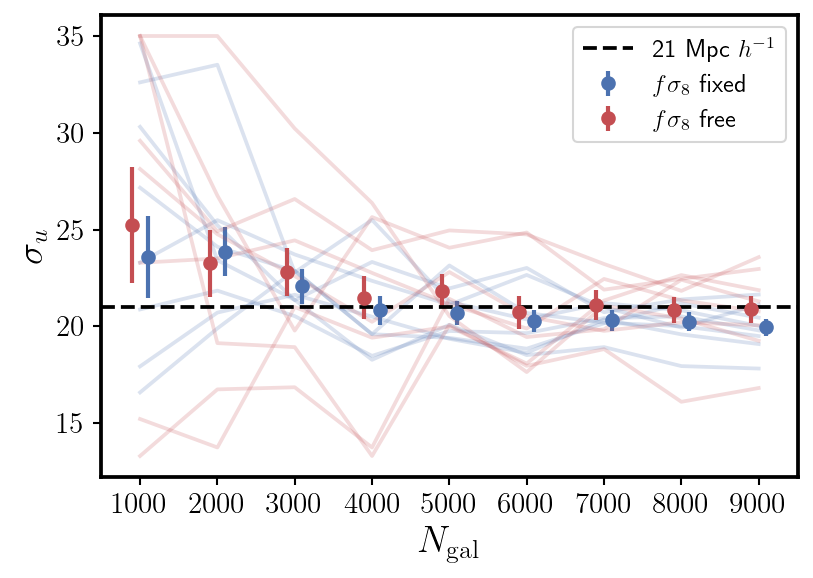

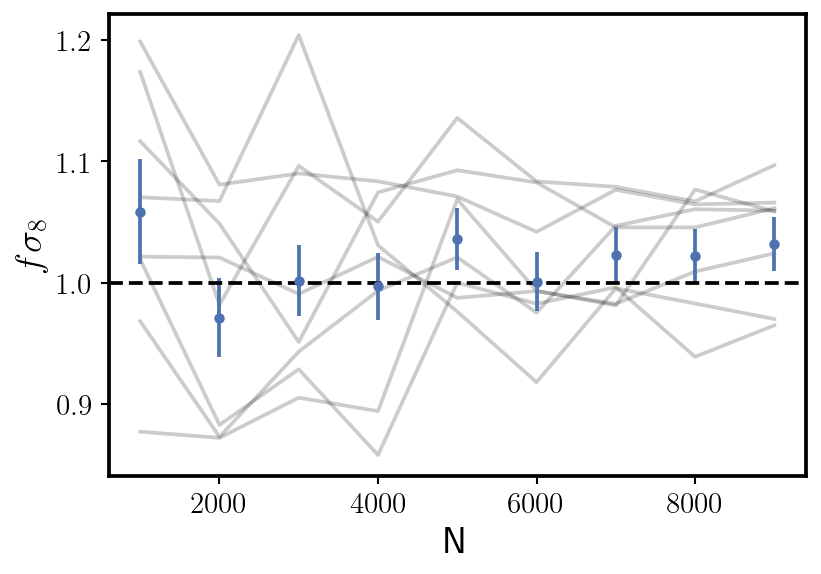

In [13]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot()

plot_sigu(df, fs8_fixed=True, ax=ax, color='C0', label=r'$f\sigma_8$ fixed', offset=100)
plot_sigu(df, fs8_fixed=False, ax=ax, color='C2', label=r'$f\sigma_8$ free', offset=-100)
plt.axhline(21, ls='--', c='k', label='21 Mpc $h^{-1}$')
plt.legend()

plt.xticks(np.arange(1000, 10000, 1000))
plt.savefig('../Figures/sigu.pdf', dpi=None, bbox_inches='tight')

plot_fs8(df)
plt.axhline(1, ls='--', c='k')

In [ ]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot()
#plot_sigu(df, ax=ax, color='C0', label=r'$f\sigma_8$ free')
plot_sigu(df, fs8_fixed=False, ax=ax, color='C1', label=r'$f\sigma_8=1$', offset=100)
#plot_sigu(df_mw, ax=ax, color='C1', label=r'$f\sigma_8$ free')
plot_sigu(df_mw, fs8_fixed=False, ax=ax, color='C3', label=r'$f\sigma_8=1$', offset=-100)
plt.legend()

In [ ]:
mask = df.fs8_fixed==False
plt.figure(dpi=150)
plt.scatter(df.N[mask], df.e_fs8[mask])
plt.ylim(0, 0.2)

plt.figure(dpi=150)
plt.scatter(df.N[mask], df.e_fs8[mask] / df.fs8[mask])
plt.ylim(0, 0.25)
